In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ratings = pd.read_csv('ratings.csv')
finalbooks = pd.read_csv('finalbooks.csv')

In [3]:
ratings['book_id'].value_counts().head(100)
out = ratings.groupby(by='book_id', as_index=False).agg({'rating':pd.Series.count})
outid = out.loc[out.rating>=7500]['book_id'].tolist()
testbooks = finalbooks[~finalbooks['book_id'].isin(outid)]
testratings = ratings[~ratings['book_id'].isin(outid)]

In [4]:
finalbooks['genres'] = finalbooks['genres'].fillna('Unknown')
finalbooks['tag_cloud'] = ['-'.join(x.split('|')) for x in finalbooks['genres']]

In [5]:
useronly = ratings.groupby(by='user_id', as_index = False).agg({'rating':pd.Series.count}).sort_values('rating', ascending=False).head(15000)

In [6]:
finalratings = ratings[ratings.user_id.isin(useronly.user_id)]
bookonly = finalratings.groupby(by = 'book_id', as_index = False).agg({'rating' : pd.Series.count}).sort_values('rating', ascending=False).head(8000)
finalratings = finalratings[ratings.book_id.isin(bookonly.book_id)]

<ipython-input-6-7fff1f8f0554>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  finalratings = finalratings[ratings.book_id.isin(bookonly.book_id)]


In [7]:
finalbooks = finalbooks[finalbooks.book_id.isin(bookonly.book_id)]
finalbooks = finalbooks.reset_index(drop=True)
finalbooks['newbookid'] = finalbooks.index+1
finalbooks

,book_id,goodreads_book_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,...,image_url_x,small_image_url,book_authors,book_desc,book_pages,genres,firstgenre,mosttagged,tag_cloud,newbookid
0,1,2767052,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,...,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,Winning will make you famous. Losing means cer...,374 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,youngadult,Young Adult-Fiction-Science Fiction-Dystopia-F...,1
1,1,2767052,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,...,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,Winning will make you famous.Losing means cert...,454 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,youngadult,Young Adult-Fiction-Science Fiction-Dystopia-F...,2
2,1,2767052,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,...,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,Winning will make you famous. Losing means cer...,374 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,youngadult,Young Adult-Fiction-Science Fiction-Dystopia-F...,3
3,1,2767052,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,...,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,Sometime in the future after the destruction o...,436 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,youngadult,Young Adult-Fiction-Science Fiction-Dystopia-F...,4
4,3,41865,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,...,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Stephenie Meyer,About three things I was absolutely positive.F...,498 pages,Young Adult|Fantasy|Romance|Paranormal|Vampire...,Young Adult,youngadult,Young Adult-Fantasy-Romance-Paranormal-Vampire...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8440,9984,764165,39,140255087,9.780000e+12,Peter Matthiessen,1978.0,The Snow Leopard,The Snow Leopard,eng,...,https://images.gr-assets.com/books/1309211772m...,https://images.gr-assets.com/books/1309211772s...,Peter Matthiessen,When Matthiessen went to Nepal to study the Hi...,352 pages,Travel|Nonfiction|Environment|Nature|Autobiogr...,Travel,travel,Travel-Nonfiction-Environment-Nature-Autobiogr...,8441
8441,9990,294081,40,140143912,9.780000e+12,Oscar Hijuelos,1989.0,The Mambo Kings Play Songs of Love,The Mambo Kings Play Songs of Love,eng,...,https://images.gr-assets.com/books/1330072994m...,https://images.gr-assets.com/books/1330072994s...,Oscar Hijuelos,"A Pulitzer Prize winning, bestselling sensatio...",407 pages,Fiction|Music,Fiction,fiction,Fiction-Music,8442
8442,9995,15613,199,1416523723,9.780000e+12,Herman Melville,1924.0,"Billy Budd, Sailor","Billy Budd, Sailor",eng,...,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,Herman Melville,A handsome young sailor is unjustly accused of...,160 pages,Classics|Fiction|Literature|Historical|Histori...,Classics,classics,Classics-Fiction-Literature-Historical-Histori...,8443
8443,9996,7130616,19,441019455,9.780000e+12,Ilona Andrews,2010.0,Bayou Moon,"Bayou Moon (The Edge, #2)",eng,...,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,Ilona Andrews,"The Edge lies between worlds, on the border be...",447 pages,Fantasy|Urban Fantasy|Fantasy|Romance|Fantasy|...,Fantasy,fantasy,Fanta

In [8]:
finalratings = finalratings.merge(finalbooks[['book_id', 'newbookid']], how='left', on=['book_id'])
finalratings.dropna(subset = ["newbookid"], inplace=True)
finalratings['newbookid'] = [int(x) for x in finalratings['newbookid']]
finalratings

,user_id,book_id,rating,newbookid
0,4,70,4,286
1,4,70,4,287
2,4,70,4,288
3,4,70,4,289
4,4,264,3,867
...,...,...,...,...
4500986,15292,854,4,1906
4500987,23863,2332,1,3744
4500988,49925,330,5,1022
4500989,49925,510,5,1322


In [9]:
finalratings['newuser_id'] = finalratings.groupby('user_id').grouper.group_info[0]+1
finalratings

,user_id,book_id,rating,newbookid,newuser_id
0,4,70,4,286,1
1,4,70,4,287,1
2,4,70,4,288,1
3,4,70,4,289,1
4,4,264,3,867,1
...,...,...,...,...,...
4500986,15292,854,4,1906,5077
4500987,23863,2332,1,3744,7678
4500988,49925,330,5,1022,14274
4500989,49925,510,5,1322,14274


In [10]:
finalratings = finalratings.drop(['user_id', 'book_id'], axis=1)
finalbooks = finalbooks.drop(['book_id', 'goodreads_book_id'], axis=1)

In [11]:
finalratings['good'] = [1 if x>=4 else 0 for x in finalratings['rating']]

In [12]:
finalratings

,rating,newbookid,newuser_id,good
0,4,286,1,1
1,4,287,1,1
2,4,288,1,1
3,4,289,1,1
4,3,867,1,0
...,...,...,...,...
4500986,4,1906,5077,1
4500987,1,3744,7678,0
4500988,5,1022,14274,1
4500989,5,1322,14274,1


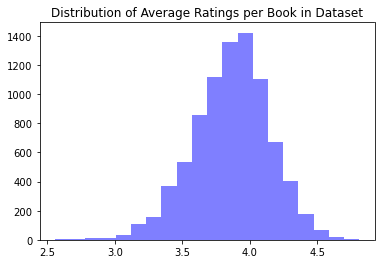

In [13]:
# Average ratings for the books in the data base
agg=finalratings.groupby(by='newbookid', as_index=False).agg({'rating': pd.Series.mean})
n, bins, patches = plt.hist(agg['rating'], 20, facecolor = 'blue', alpha=0.5)
plt.title('Distribution of Average Ratings per Book in Dataset')
plt.show()

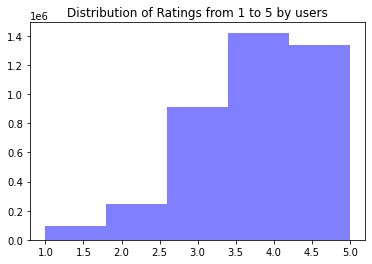

In [14]:
# Distribution of the individual ratings given by our User base
n, bins, patches = plt.hist(finalratings['rating'], 5, facecolor='blue', alpha=0.5)
plt.title('Distribution of Ratings from 1 to 5 by users')
plt.show()

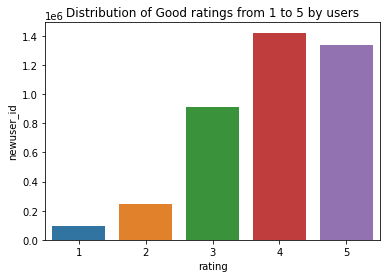

In [15]:
# Distribution of the individual ratings given by our user base
distr = finalratings.groupby(by='rating', as_index=False).agg({'newuser_id':pd.Series.count})
sns.barplot(x='rating', y='newuser_id', data=distr)
plt.title("Distribution of Good ratings from 1 to 5 by users")
plt.show()

In [16]:
# Distribution of the no. of users per rating
finalratings['rating'].value_counts()

4    1421361
5    1338304
3     909895
2     248146
1      92991
Name: rating, dtype: int64

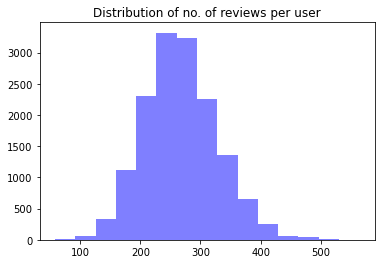

In [17]:
# Distribution of the no. of reviews per user
n, bins, patches = plt.hist(finalratings['newuser_id'].value_counts(), 15, facecolor='blue', alpha=0.5)
plt.title('Distribution of no. of reviews per user')
plt.show()

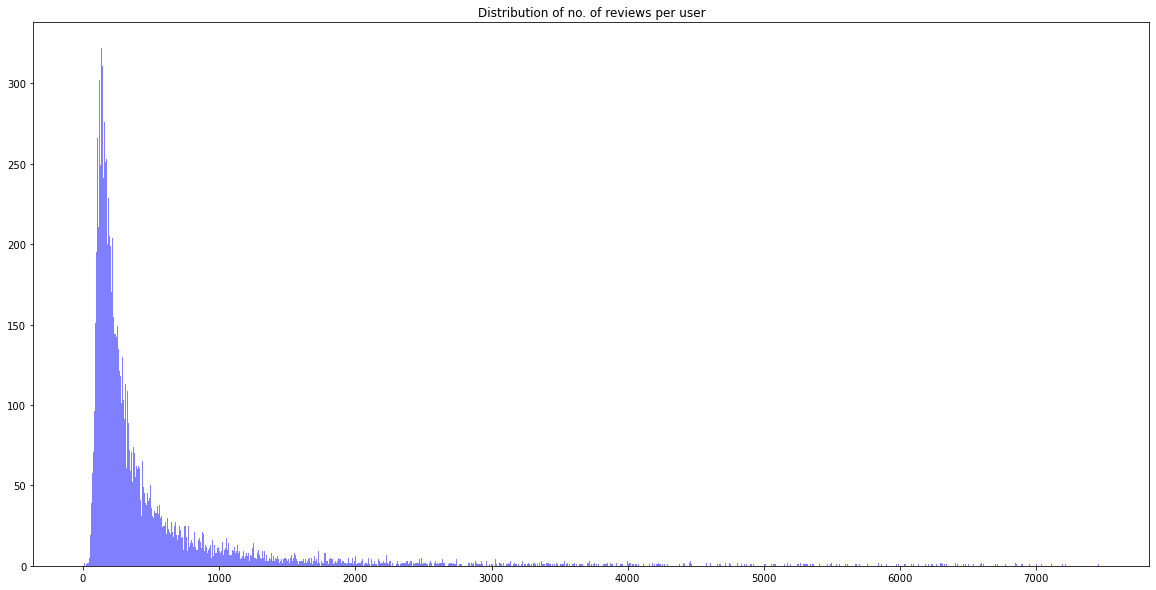

In [18]:
# Distribution of the no.of revviews per book
facet, axes = plt.subplots(1, 1, figsize=(20,10))
n, bins, patches = plt.hist(testratings['book_id'].value_counts(), 1000, facecolor='blue', alpha=0.5)
plt.title('Distribution of no. of reviews per user')
plt.show()

In [19]:
finalbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8445 entries, 0 to 8444
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   books_count                8445 non-null   int64  
 1   isbn                       8088 non-null   object 
 2   isbn13                     8142 non-null   float64
 3   authors                    8445 non-null   object 
 4   original_publication_year  8442 non-null   float64
 5   original_title             8445 non-null   object 
 6   title                      8445 non-null   object 
 7   language_code              7821 non-null   object 
 8   average_rating             8445 non-null   float64
 9   ratings_count              8445 non-null   int64  
 10  ratings_1                  8445 non-null   int64  
 11  ratings_2                  8445 non-null   int64  
 12  ratings_3                  8445 non-null   int64  
 13  ratings_4                  8445 non-null   int64

In [20]:
finalbooks['firstgenre'] = [x.split('|')[0] for x in finalbooks['genres']]
finalbooks['mosttagged'] = [x.lower() for x in finalbooks['firstgenre']]
finalbooks['tag_cloud'] = [x.lower() for x in finalbooks['genres']]
finalbooks['tag_cloud'] = ['-'.join(x.split('|')) for x in finalbooks['tag_cloud']]

In [21]:
testbooks['genres'] = testbooks['genres'].fillna('Unknown')
testbooks['firstgenre'] = [x.split('|')[0] for x in testbooks['genres']]
testbooks['mosttagged'] = [x.lower() for x in testbooks['firstgenre']]
testbooks['tag_cloud'] = [x.lower() for x in testbooks['genres']]
testbooks['tag_cloud'] = ['-'.join(x.split('|')) for x in testbooks['tag_cloud']]

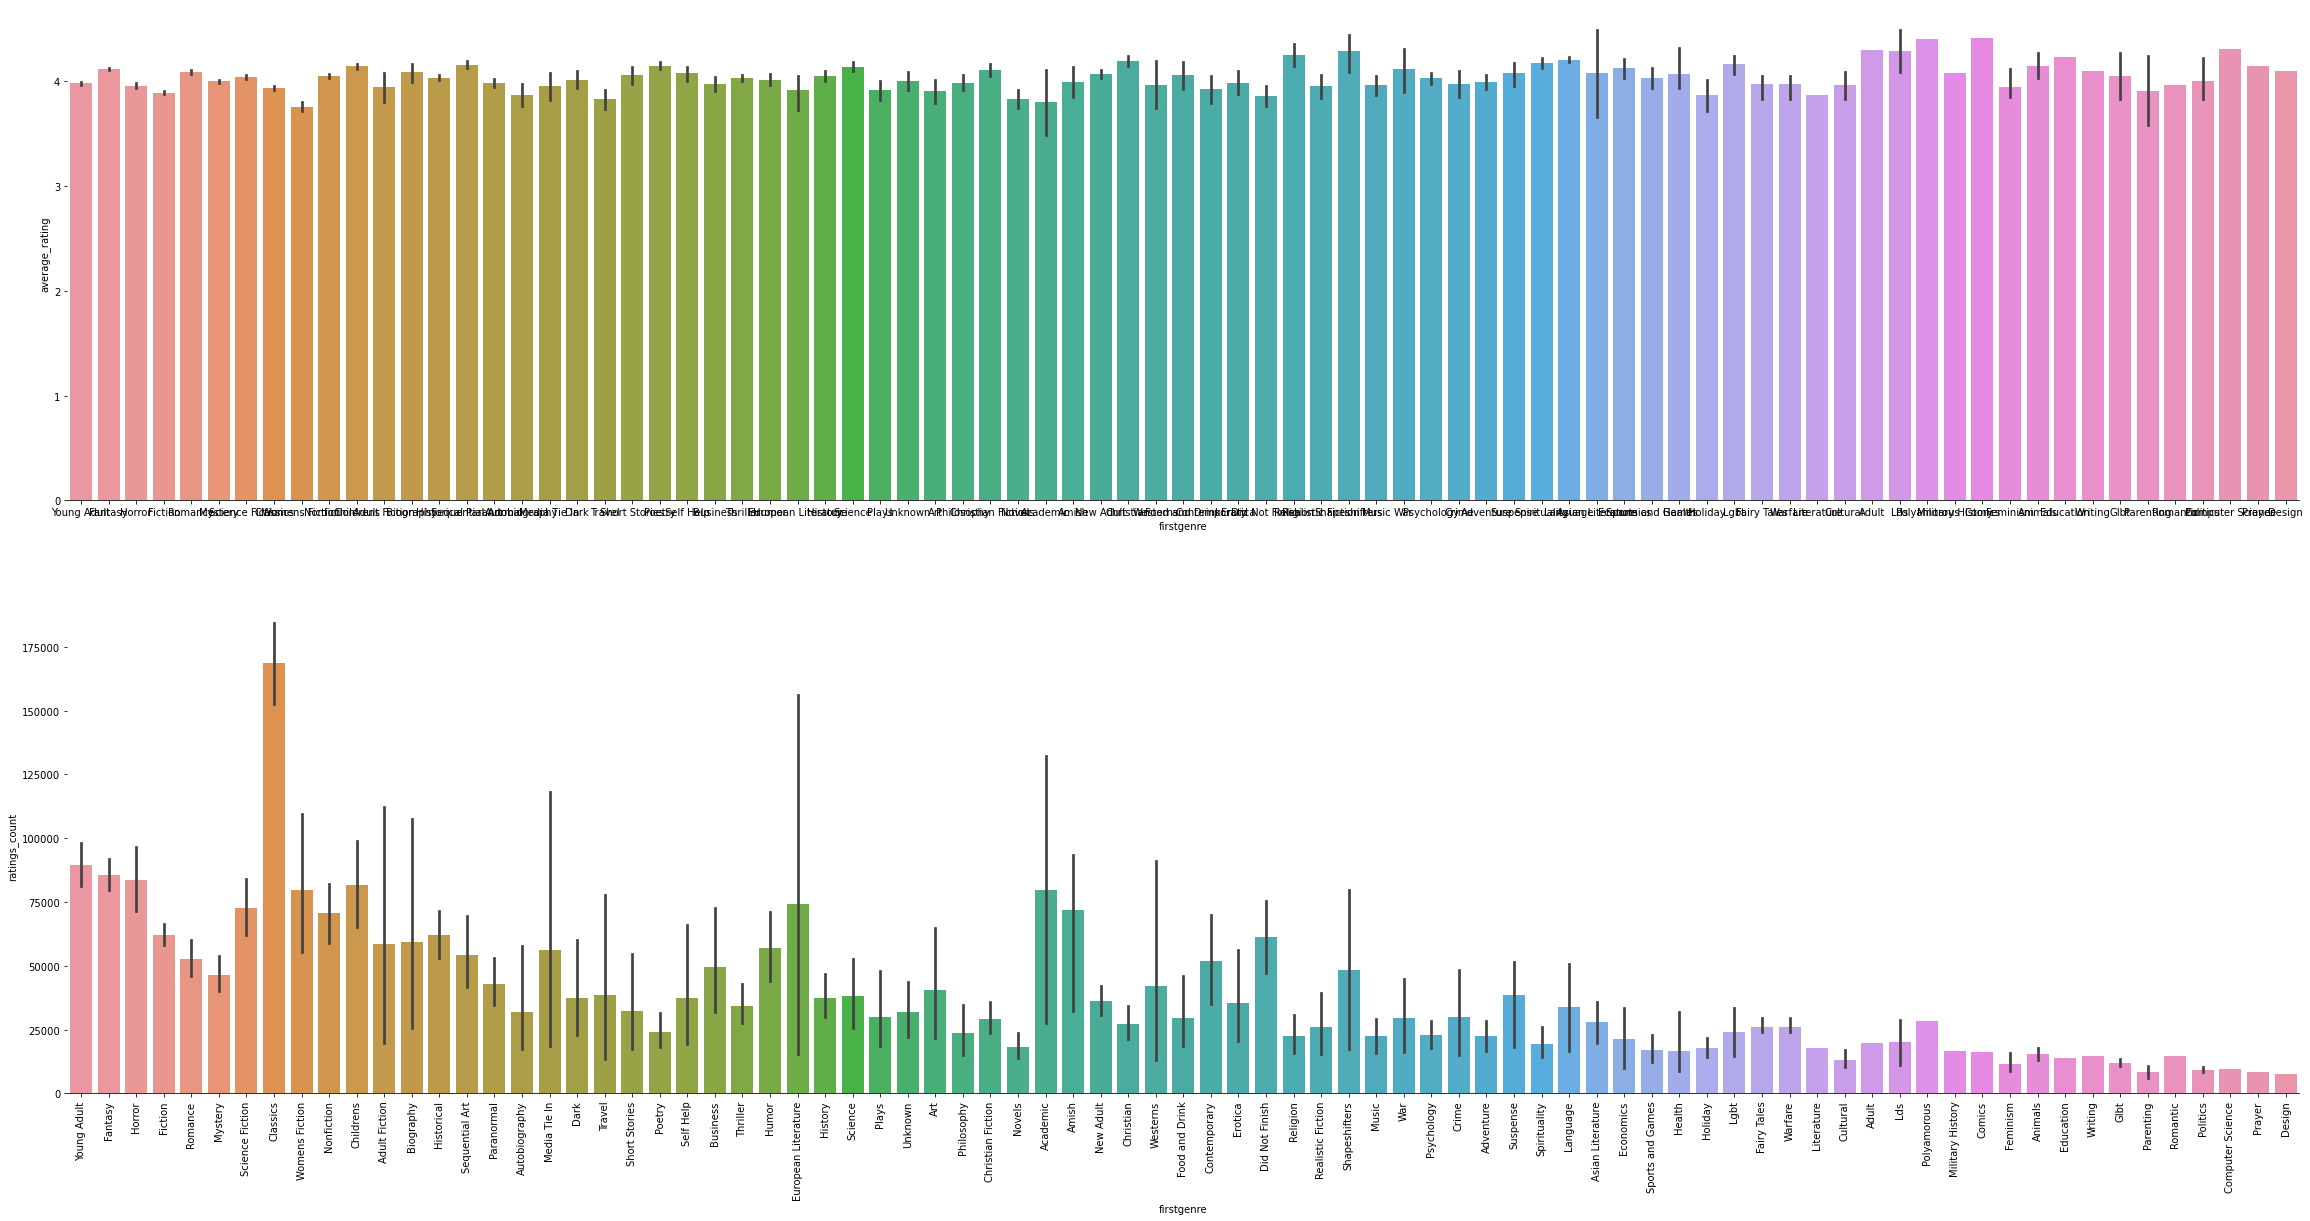

In [22]:
# Distribution of the no. of ratings per book
facets, axes = plt.subplots(2,1,figsize=(40,20))
sns.despine(left=True)
sns.barplot(x='firstgenre', y='average_rating', data=testbooks, ax=axes[0])
plt.xticks(rotation=90)
sns.barplot(x='firstgenre', y='ratings_count', data=testbooks, ax=axes[1])
plt.xticks(rotation=90)
plt.show()

In [23]:
finalbooks['title'] = finalbooks['title'].str.replace(r"\(.*\)","")
finalbooks['original_title'] = finalbooks['original_title'].str.replace(r"\(.*\)","")

In [24]:
finalbooks['book_pages'] = finalbooks['book_pages'].fillna('0')


In [25]:
finalbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8445 entries, 0 to 8444
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   books_count                8445 non-null   int64  
 1   isbn                       8088 non-null   object 
 2   isbn13                     8142 non-null   float64
 3   authors                    8445 non-null   object 
 4   original_publication_year  8442 non-null   float64
 5   original_title             8445 non-null   object 
 6   title                      8445 non-null   object 
 7   language_code              7821 non-null   object 
 8   average_rating             8445 non-null   float64
 9   ratings_count              8445 non-null   int64  
 10  ratings_1                  8445 non-null   int64  
 11  ratings_2                  8445 non-null   int64  
 12  ratings_3                  8445 non-null   int64  
 13  ratings_4                  8445 non-null   int64

In [26]:
finalbooks.head(20)

,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,...,image_url_x,small_image_url,book_authors,book_desc,book_pages,genres,firstgenre,mosttagged,tag_cloud,newbookid
0,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,The Hunger Games,eng,4.34,4780653,...,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,Winning will make you famous. Losing means cer...,374 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,young adult,young adult-fiction-science fiction-dystopia-f...,1
1,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,The Hunger Games,eng,4.34,4780653,...,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,Winning will make you famous.Losing means cert...,454 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,young adult,young adult-fiction-science fiction-dystopia-f...,2
2,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,The Hunger Games,eng,4.34,4780653,...,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,Winning will make you famous. Losing means cer...,374 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,young adult,young adult-fiction-science fiction-dystopia-f...,3
3,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,The Hunger Games,eng,4.34,4780653,...,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,Sometime in the future after the destruction o...,436 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,young adult,young adult-fiction-science fiction-dystopia-f...,4
4,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,Twilight,en-US,3.57,3866839,...,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Stephenie Meyer,About three things I was absolutely positive.F...,498 pages,Young Adult|Fantasy|Romance|Paranormal|Vampire...,Young Adult,young adult,young adult-fantasy-romance-paranormal-vampire...,5
5,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,Twilight,en-US,3.57,3866839,...,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Meg Cabot,This time it's life or death.Suze has gotten u...,312 pages,Young Adult|Fantasy|Paranormal|Fantasy|Romance...,Young Adult,young adult,young adult-fantasy-paranormal-fantasy-romance...,6
6,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,Twilight,en-US,3.57,3866839,...,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Erin Hunter,"Before there is peace, blood will spill blood....",319 pages,Fantasy|Animals,Fantasy,fantasy,fantasy-animals,7
7,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,Twilight,en-US,3.57,3866839,...,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Stephenie Meyer,About three things I was absolutely positive.F...,498 pages,Young Adult|Fantasy|Romance|Paranormal|Vampire...,Young Adult,young adult,young adult-fantasy-romance-paranormal-vampire...,8
8,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,Twilight,en-US,3.57,3866839,...,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,William Gay,A Southern gothic novel about an undertaker wh...,224 pages,Horror|Fiction|Gothic|Southern Gothic|Gothic|A...,Horror,horror,horror-fiction-gothic-southern gothic-gothic-a...,9
9,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,Twilight,en-US,3.57,3866839,...,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Peter James,Three muffled thuds ring from the partially 

In [27]:
finalbooks.to_csv('finalbook.csv', index= False)

In [28]:
finalratings.to_csv('finalratings.csv', index=False)